In [2]:
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from ipywidgets import Button, HBox, VBox, Layout
from IPython.display import display, clear_output

from scripts.etri_dataloaders import ETRIDataset
from torchvision import transforms as T
import matplotlib.pyplot as plt

from scripts.etri_dataloaders import ETRIDataset
from scripts.custom_transformations import repeat_color_channel, min_max_normalization, ConvertToUint8, ConvertToFloat32
from scripts.custom_transformations import ConvertToFloat64, sample_frames, PermuteDimensions

In [12]:
class ClipVisualizer:
    def __init__(self, dataset):
        self.dataset = dataset
        self.num_clips = len(dataset)
        self.current_clip_idx = 0
        self.clip = dataset[self.current_clip_idx]

        self.num_frames = self.clip[0].shape[1]
        self.current_frame = 0

        self.fig, self.ax = plt.subplots()
        
        self.img = self.ax.imshow(self.clip[0][0][self.current_frame])
        self.ax.set_title(f'Clip {self.current_clip_idx + 1}/{self.num_clips}, Frame {self.current_frame + 1}/{self.num_frames}')

        self.bprev_frame = Button(description='Prev Frame')
        self.bprev_frame.on_click(self.prev_frame)

        self.bnext_frame = Button(description='Next Frame')
        self.bnext_frame.on_click(self.next_frame)

        self.bprev_clip = Button(description='Prev Clip')
        self.bprev_clip.on_click(self.prev_clip)

        self.bnext_clip = Button(description='Next Clip')
        self.bnext_clip.on_click(self.next_clip)

        self.jump_10_frames_button = Button(description='Jump 10 Frames')
        self.jump_10_frames_button.on_click(self.jump_10_frames)
       
        self.update_display()

    def update_display(self):
        clear_output(wait=True)
        self.fig.canvas.draw()
        display(self.fig)
        #display(VBox([HBox([self.bprev_clip, self.bprev_frame, self.bnext_frame, self.bnext_clip])]))
        display(HBox([self.bprev_clip, self.bprev_frame, self.bnext_frame, self.bnext_clip, self.jump_10_frames_button]))


    def update_frame(self):
        clear_output(wait=True)
        self.img.set_data(self.clip[0][0][self.current_frame])
        self.ax.set_title(f'Clip {self.current_clip_idx + 1}/{self.num_clips}, Frame {self.current_frame + 1}/{self.num_frames} Action: {self.clip[1]}')
        self.fig.canvas.draw()
        display(self.fig)
        display(HBox([self.bprev_clip, self.bprev_frame, self.bnext_frame, self.bnext_clip,self.jump_10_frames_button]))

    # def start_auto_next_frame(self, event):
    #     if not self.auto_running:
    #         self.auto_running = True
    #         self.auto_next_thread = threading.Thread(target=self.auto_next_frames)
    #         self.auto_next_thread.start()

    # def auto_next_frames(self):
    #     while self.auto_running:
    #         time.sleep(self.fps)  # Wait for 1 second
    #         self.next_frame(None)

    # def stop_auto_next_frame(self):
    #     self.auto_running = False
    #     if self.auto_next_thread is not None:
    #         self.auto_next_thread.join()
    def jump_10_frames(self, event):
        if self.current_frame + 10 < self.num_frames:
            self.current_frame += 10
        else:
            self.current_frame = self.num_frames - 1
        self.update_frame()


    def prev_frame(self, event):
        if self.current_frame > 0:
            self.current_frame -= 1
            self.update_frame()

    def next_frame(self, event):
        if self.current_frame < self.num_frames - 1:
            self.current_frame += 1
            self.update_frame()

    def prev_clip(self, event):
        if self.current_clip_idx > 0:
            self.current_clip_idx -= 1
            self.clip = self.dataset[self.current_clip_idx]
            self.num_frames = self.clip[0].shape[1]
            self.current_frame = 0
            self.update_frame()

    def next_clip(self, event):
        if self.current_clip_idx < self.num_clips - 1:
            self.current_clip_idx += 1
            self.clip = self.dataset[self.current_clip_idx]
            self.num_frames = self.clip[0].shape[1]
            self.current_frame = 0
            self.update_frame()

In [18]:
#compose_transformations 
train_transform = T.Compose([
    min_max_normalization(scale_up=True),
    ConvertToFloat32(),
    PermuteDimensions(order=[3, 0, 1, 2]),
    repeat_color_channel(),
    sample_frames(nth=8),
])



train_set =  ETRIDataset(
    root_dir=r"/data/fhuemer/etri/masked_depthmaps",
    mode = "train",
    remove_background=False,
    transform=train_transform,
    single_camera=True,
    elders_only=True,
    max_number_frames = 500,
)


#########################################
4738
#########################################


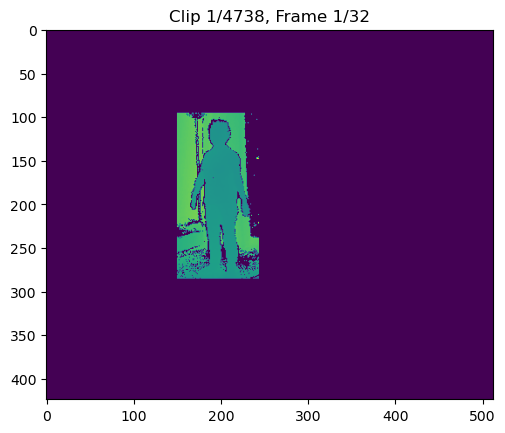

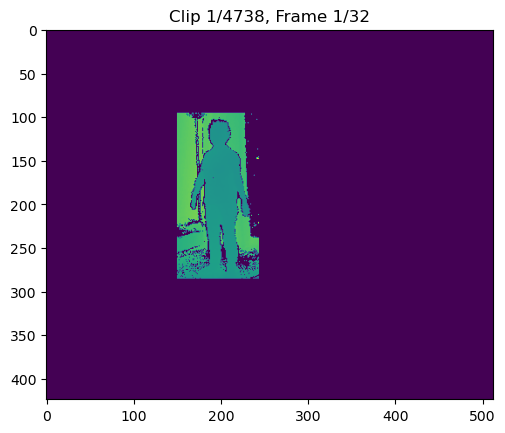

In [20]:
visualizer = ClipVisualizer(train_set)

In [ ]:
# !jupyter nbextension enable --py widgetsnbextension
# !jupyter nbextension enable --py ipywidgets